In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout

# 데이터 로드 및 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

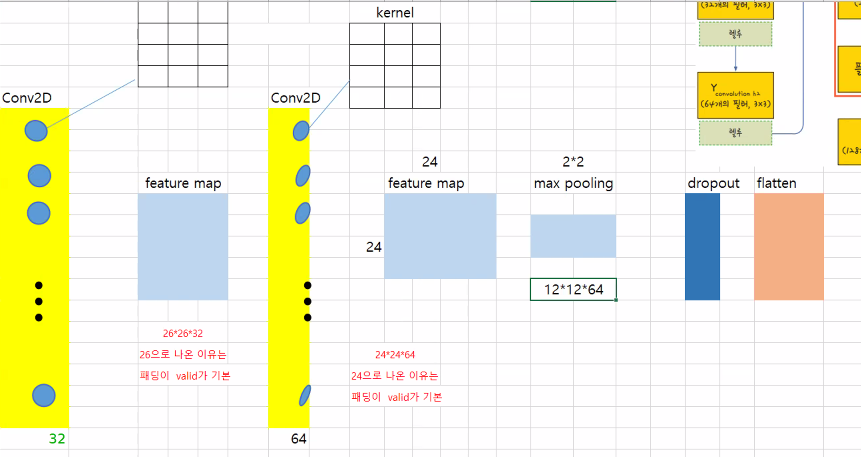

In [7]:

# 모델 정의
# 트랜스포트, 쳇gpt이해
model = Sequential()
model.add(
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu')
)
model.add(
    Conv2D(64, kernel_size=(3,3),activation='relu')
)
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # 1차원 과적합 때문에
model.add(Dense(10, activation='softmax')) 


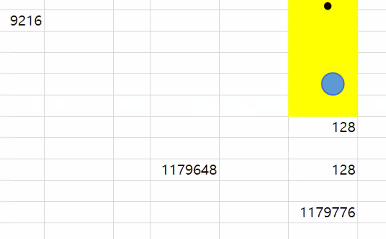
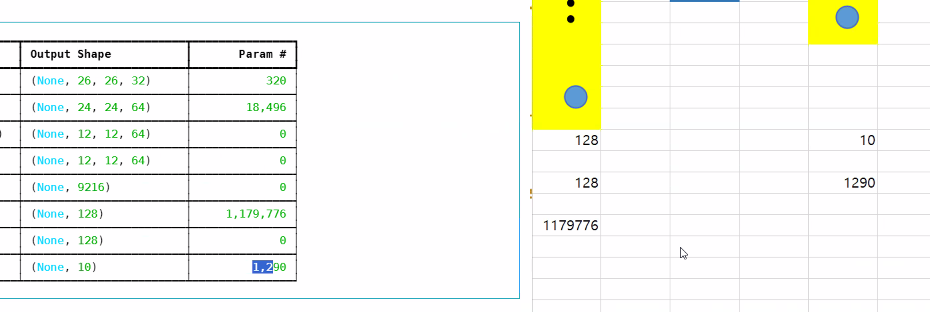

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [14]:

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# # 콜백 정의 patience=10
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
modelpath = "./model/MNIST3_CNN_model.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, verbose=1)

# # 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=200,
                    validation_split=0.25,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9851 - loss: 0.0495
Epoch 1: val_loss improved from inf to 0.04197, saving model to ./model/MNIST3_CNN_model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9851 - loss: 0.0495 - val_accuracy: 0.9867 - val_loss: 0.0420
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9907 - loss: 0.0303
Epoch 2: val_loss did not improve from 0.04197
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.9907 - loss: 0.0303 - val_accuracy: 0.9869 - val_loss: 0.0467
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9931 - loss: 0.0240
Epoch 3: val_loss did not improve from 0.04197
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9931 - loss: 0.0240 - val_accuracy: 0.9873 - val_loss: 0.0429
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9938 - loss: 0.0187
Epoch 4: val_loss improved from 0.04197 to 0.03760, saving model to ./model/MNIST3_CNN_model.keras
225/225

In [15]:
list (history.history)

['accuracy', 'loss', 'val_accuracy', 'val_loss']

In [16]:
# 정확도
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

0.9962444305419922
0.9879999756813049


In [17]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9878 - loss: 0.0474


[0.03842249885201454, 0.9900000095367432]

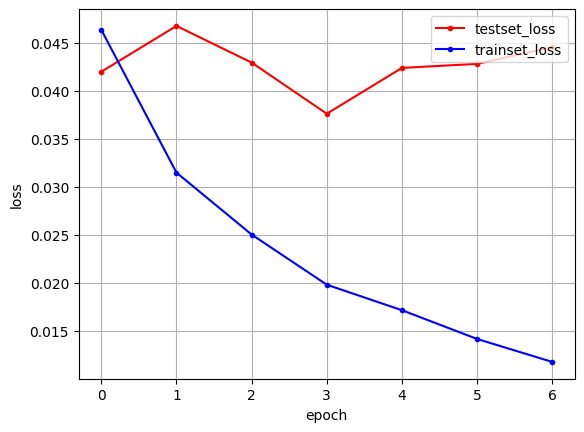

In [18]:
import numpy as np
import pandas as pd



history_df = pd.DataFrame(data=history.history)
# history_df.head()
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue' , label='trainset_loss')
plt.legend(loc=1)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss') 
plt.show()

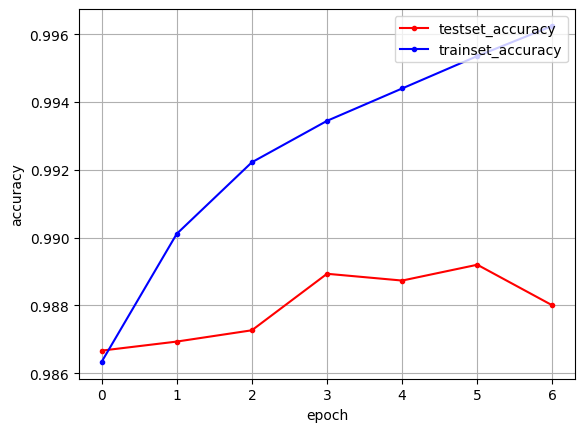

In [19]:
import numpy as np
import pandas as pd



history_df = pd.DataFrame(data=history.history)
# history_df.head()
y_val_accuracy = history.history['val_accuracy']
y_accuracy = history.history['accuracy']

x_len = np.arange(len(y_accuracy))

plt.plot(x_len, y_val_accuracy, marker='.', c='red', label='testset_accuracy')
plt.plot(x_len, y_accuracy, marker='.', c='blue' , label='trainset_accuracy')
plt.legend(loc=1)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy') 
 
plt.show()